<a href="https://colab.research.google.com/github/casjunior93/Analise-de-terromotos-ocorridos-no-Brasil-desde-1900/blob/master/C%C3%B3pia_de_Terremotos_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de terromotos ocorridos no Brasil desde o início dos registros sísmicos**

No dia 24/02/2022, habitantes das cidades de Espírito Santo do Pinhal-SP, Santo Antônio do Jardim-SP, São João da Boa Vista-SP, Águas da Prata-SP e Poços de Caldas-MG, relataram que houve um tremor perceptível de terra após um barulho alto parecido com um trovão.

Segundo relatos, "Houve um estrondo grande, parecido com um forte trovão", e após houve um tremor de terra de curta duração.

Atualização: Segundo o Observatório Cismológico de São Sebastião da Grama (SP), o terremoto teve magnitude 2.7 na Escala Richter e teve como epicentro a cidade de São Sebastião da Grama (SP). Fonte: https://andradas.portaldacidade.com/noticias/regiao/regiao-de-andradas-e-atingida-por-terremoto-de-magnitude-27-5909

O interessante é que tal fenômeno ocorreu no centenário do maior tremor já registrado na Região Sudeste do Brasil. O "Sismo de Pinhal", ocorrido em 27 de janeiro de 1922, atingiu magnitude 5.1 na escala Richter. Fonte: https://portaldepinhal.com.br/2022/01/o-terremoto-que-apavorou-sp-ha-100-anos-epicentro-foi-em-espirito-santo-do-pinhal/ e https://www.youtube.com/watch?v=0qDSh68XqpY&ab_channel=DepartamentodeGeof%C3%ADsicadoIAG-USP .

Tal ocorrido me motivou a fazer uma análise dos terremotos que aconteceram no Brasil, na tentativa de identificar algum padrão geográfico ou temporal. Outro fator que me motivou é que moro em Andradas-MG, que fica na região onde ocorreu o tremor desse 24 de fevereiro e cerca de 30-40 quilômetros do epicentro do sismo de 1922.

Para essa análise vou usar dados da versão do Boletim Sísmico do Centro de Sismologia da USP de janeiro de 2022 (http://moho.iag.usp.br/eq/bulletin/). Como os dados do boletim vão até o final do ano de 2020, eu irei complementar os dados do boletim com os dados obtidos através da consulta à ferramenta Últimos terremotos do Centro de Sismologia da USP (http://moho.iag.usp.br/eq/latest).

# Importando os dados


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Bibliotecas Python

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Dados do Centro de Sismologia da USP

Dados obtidos da página Últimos terremotos (http://moho.iag.usp.br/eq/latest). Os dados são de 01 de janeiro de 2021 até 26 de fevereiro de 2022.

In [3]:
df_uterremotos = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Terremotos/dados/Catalogo.csv')
df_uterremotos.tail(5)

,data,longitude,latitude,magnitude,regiao
320,2021-01-17T17:12:06.21Z,-48678,-13161,3.2,Montividiu do Norte/GO
321,2021-01-15T22:36:37.7Z,-39380,-5129,1.9,Quixeramobim/CE
322,2021-01-09T15:39:11.687Z,-58422,-25434,2.2,Northeastern Argentina
323,2021-01-07T15:27:44.690Z,-40104,-3715,2.1,Sobral/CE
324,2021-01-07T02:46:29.358Z,-40318,-3540,2.2,Massape/CE


## Features do dataframe

* `data` - Data do terremoto
* `longitude` - Longitude do epicentro
* `latitude` - Latitude do epicentro
* `magnitude` - Magnitude do sismo
* `regiao` - Região do sismo 

### Pré-análise do dataframe

Análise geral do dataframe df_boletim:

In [4]:
df_uterremotos.shape

(325, 5)

In [5]:
df_uterremotos.describe(include='all')

,data,longitude,latitude,magnitude,regiao
count,325,325.000000,325.000000,325.000000,325
unique,325,NaN,NaN,NaN,155
top,2022-02-24T23:48:48.359Z,NaN,NaN,NaN,Guyana
freq,1,NaN,NaN,NaN,48
mean,NaN,-47005.858462,-9199.387692,2.503692,NaN
std,NaN,9665.982154,8547.957020,0.836541,NaN
min,NaN,-74186.000000,-33643.000000,0.900000,NaN
25%,NaN,-57532.000000,-17781.000000,1.900000,NaN
50%,NaN,-44825.000000,-8181.000000,2.300000,NaN
75%,NaN,-39509.000000,-3749.000000,3.000000,NaN


Tipo dos dados:

In [6]:
df_uterremotos.dtypes

data          object
longitude      int64
latitude       int64
magnitude    float64
regiao        object
dtype: object

Dados faltantes:

In [7]:
df_uterremotos.isnull().sum()

data         0
longitude    0
latitude     0
magnitude    0
regiao       0
dtype: int64

O dataframe não tem dados faltantes, mas pode-se perceber pela visualização dos dados e pela análise descritiva que existem localidades que estão fora do Brasil. Como o foco do estudo é o território brasileiro, vou encontrar esse dados e excluí-los.

Na análise descritiva, pode-se perceber que a Guyana é a região com maior frequência de terremotos. Porém, é uma região fora do Brasil. Por isso decidi excluí-la.

In [8]:
df_uterremotos.drop(df_uterremotos.loc[df_uterremotos['regiao']=='Guyana'].index, inplace=True)

O próximo passo é identificar quais regiões possuem a sigla de algum estado brasileiro. As regiões que não tiverem serão avaliadas.

In [9]:
estados = [
    'AC',
    'AL',
    'AP',
    'AM',
    'BA',
    'CE',
    'DF',
    'ES',
    'GO',
    'MA',
    'MT',
    'MS',
    'MG',
    'PA',
    'PB',
    'PR',
    'PE',
    'PI',
    'RJ',
    'RN',
    'RS',
    'RO',
    'RR',
    'SC',
    'SP',
    'SE',
    'TO'
]

def temEstadoBR(df):
  ''' verifica se a região possui a sigla de algum estado brasileiro '''
  for estado in estados:
    if estado in df.regiao:
      return 1
  return 0

def estadoBR(df):
  ''' verifica se a regiao possui estado e insera na coluna estadoBR '''
  for estado in estados:
    if estado in df.regiao:
      return estado
  return '-'
 
# creating and passing series to new column
df_uterremotos["temEstadoBR"]= df_uterremotos.apply(temEstadoBR, axis=1)
df_uterremotos["estadoBR"]= df_uterremotos.apply(estadoBR, axis=1)

In [10]:
df_uterremotos.groupby(['temEstadoBR']).count()

,data,longitude,latitude,magnitude,regiao,estadoBR
temEstadoBR,,,,,,
0,10,10,10,10,10,10
1,267,267,267,267,267,267


In [11]:
df_uterremotos.loc[df_uterremotos.temEstadoBR == 0].head(10)

,data,longitude,latitude,magnitude,regiao,temEstadoBR,estadoBR
93,2021-10-12T04:34:34.519Z,-71313,-9599,4.3,Peru-Brazil Border Region,0,-
94,2021-10-02T12:52:33.664Z,-71204,-9569,5.9,Peru-Brazil Border Region,0,-
98,2021-09-27T21:52:31.489Z,-72667,-6805,4.3,Peru-Brazil Border Region,0,-
121,2021-09-03T16:29:06.750Z,-61784,-14656,4.0,Central Bolivia,0,-
130,2021-08-22T08:28:10.896Z,-74186,-8328,5.0,Peru-Brazil Border Region,0,-
206,2021-05-18T15:20:56.712Z,-72573,-8503,4.1,Peru-Brazil Border Region,0,-
219,2021-05-08T11:55:29.739Z,-55971,-33643,3.5,Uruguay,0,-
239,2021-04-11T04:21:02.674Z,-71304,-9243,4.3,Peru-Brazil Border Region,0,-
306,2021-01-29T15:46:07.125Z,-74135,-8490,4.2,Peru-Brazil Border Region,0,-
322,2021-01-09T15:39:11.687Z,-58422,-25434,2.2,Northeastern Argentina,0,-


Vou excluir as linhas que contém as regiões do Uruguai, Bolívia e Argentina e investigar as linhas que contém a região de fronteira com o Peru.

In [12]:
df_uterremotos.drop(df_uterremotos.loc[df_uterremotos['regiao']=='Central Bolivia'].index, inplace=True)
df_uterremotos.drop(df_uterremotos.loc[df_uterremotos['regiao']=='Uruguay'].index, inplace=True)
df_uterremotos.drop(df_uterremotos.loc[df_uterremotos['regiao']=='Northeastern Argentina'].index, inplace=True)

In [13]:
df_semEstados = df_uterremotos.loc[df_uterremotos.temEstadoBR == 0]
df_semEstados.head(10)

,data,longitude,latitude,magnitude,regiao,temEstadoBR,estadoBR
93,2021-10-12T04:34:34.519Z,-71313,-9599,4.3,Peru-Brazil Border Region,0,-
94,2021-10-02T12:52:33.664Z,-71204,-9569,5.9,Peru-Brazil Border Region,0,-
98,2021-09-27T21:52:31.489Z,-72667,-6805,4.3,Peru-Brazil Border Region,0,-
130,2021-08-22T08:28:10.896Z,-74186,-8328,5.0,Peru-Brazil Border Region,0,-
206,2021-05-18T15:20:56.712Z,-72573,-8503,4.1,Peru-Brazil Border Region,0,-
239,2021-04-11T04:21:02.674Z,-71304,-9243,4.3,Peru-Brazil Border Region,0,-
306,2021-01-29T15:46:07.125Z,-74135,-8490,4.2,Peru-Brazil Border Region,0,-


Vou verificar se as coordenadas que sobraram estão dentro do Brasil, pois só vou considerar os terremotos com epicentro no Brasil.

In [ ]:
!pip install geopandas
!pip install shapely

In [15]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
meu_mapa = gpd.read_file('/content/drive/MyDrive/ANÁLISES DE DADOS/Terremotos/KML BRASIL/SEPARACAO POR REGIA/Norte.kml', driver='KML')
meu_mapa

In [17]:
df_semEstados['longitude'] = df_semEstados['longitude']/1000
df_semEstados['latitude'] = df_semEstados['latitude']/1000

In [18]:
pontos_geometricos = []
for xy in zip(df_semEstados['longitude'], df_semEstados['latitude']):
    pontos_geometricos.append(Point(xy))

In [19]:
localizacoes_geo = gpd.GeoDataFrame(df_semEstados,
                                    crs = {'init': 'epsg:4326'},
                                    geometry = pontos_geometricos)
localizacoes_geo = localizacoes_geo.reset_index()
localizacoes_geo

,index,data,longitude,latitude,magnitude,regiao,temEstadoBR,estadoBR,geometry
0,93,2021-10-12T04:34:34.519Z,-71.313,-9.599,4.3,Peru-Brazil Border Region,0,-,POINT (-71.31300 -9.59900)
1,94,2021-10-02T12:52:33.664Z,-71.204,-9.569,5.9,Peru-Brazil Border Region,0,-,POINT (-71.20400 -9.56900)
2,98,2021-09-27T21:52:31.489Z,-72.667,-6.805,4.3,Peru-Brazil Border Region,0,-,POINT (-72.66700 -6.80500)
3,130,2021-08-22T08:28:10.896Z,-74.186,-8.328,5.0,Peru-Brazil Border Region,0,-,POINT (-74.18600 -8.32800)
4,206,2021-05-18T15:20:56.712Z,-72.573,-8.503,4.1,Peru-Brazil Border Region,0,-,POINT (-72.57300 -8.50300)
5,239,2021-04-11T04:21:02.674Z,-71.304,-9.243,4.3,Peru-Brazil Border Region,0,-,POINT (-71.30400 -9.24300)
6,306,2021-01-29T15:46:07.125Z,-74.135,-8.490,4.2,Peru-Brazil Border Region,0,-,POINT (-74.13500 -8.49000)


Verificando se os pontos pertencem à Região Norte, que faz fronteira com o Peru.

In [20]:
def pertence_ao_Norte(df):
  ''' Verifica se a coordenada pertence à RegiãoNorte '''
  ponto = df.geometry
  check = meu_mapa.contains(ponto).values
  contTrue = 0;
  for valor in check:
    if valor == True:
      contTrue += 1
  if contTrue > 0:
    return 1
  else:
    return 0

In [21]:
localizacoes_geo["pertence_ao_mapa"] = localizacoes_geo.apply(pertence_ao_Norte, axis=1)

In [22]:
localizacoes_geo

,index,data,longitude,latitude,magnitude,regiao,temEstadoBR,estadoBR,geometry,pertence_ao_mapa
0,93,2021-10-12T04:34:34.519Z,-71.313,-9.599,4.3,Peru-Brazil Border Region,0,-,POINT (-71.31300 -9.59900),1
1,94,2021-10-02T12:52:33.664Z,-71.204,-9.569,5.9,Peru-Brazil Border Region,0,-,POINT (-71.20400 -9.56900),1
2,98,2021-09-27T21:52:31.489Z,-72.667,-6.805,4.3,Peru-Brazil Border Region,0,-,POINT (-72.66700 -6.80500),1
3,130,2021-08-22T08:28:10.896Z,-74.186,-8.328,5.0,Peru-Brazil Border Region,0,-,POINT (-74.18600 -8.32800),0
4,206,2021-05-18T15:20:56.712Z,-72.573,-8.503,4.1,Peru-Brazil Border Region,0,-,POINT (-72.57300 -8.50300),1
5,239,2021-04-11T04:21:02.674Z,-71.304,-9.243,4.3,Peru-Brazil Border Region,0,-,POINT (-71.30400 -9.24300),1
6,306,2021-01-29T15:46:07.125Z,-74.135,-8.490,4.2,Peru-Brazil Border Region,0,-,POINT (-74.13500 -8.49000),0


Duas coordenadas não pertencem ao território brasileiro. Vendo no Mapa:

In [23]:
import folium
import json
fig = folium.Map(width=900, height=600)

In [24]:
geo_json_mapa = json.load(open('/content/drive/MyDrive/ANÁLISES DE DADOS/Terremotos/GeoJsonNorte/Features.geojson'))
folium.Choropleth(
    geo_data = geo_json_mapa,
    fill_color = "steelblue",
    fill_opacity = 0.4,
    line_color = "steelblue",
    line_opacity = 0.9
).add_to(fig)

In [25]:
pontos = localizacoes_geo[['latitude', 'longitude']].values.tolist()
map = folium.Map(location=[-8, -73], width=900, height=500, zoom_start=7)
for point in range(0, len(pontos)):
    folium.Marker(pontos[point], popup=localizacoes_geo['regiao'][point]).add_to(map)
map

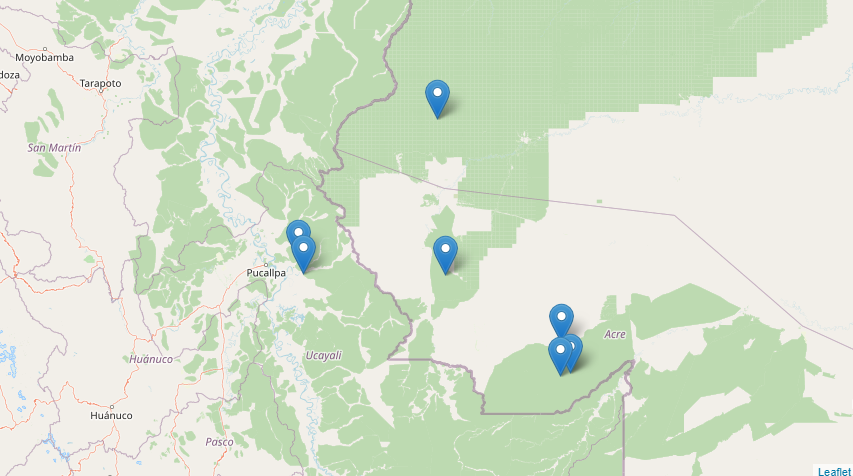

Excluindo os dois pontos fora do Brasil:

In [26]:
df_uterremotos.loc[[130]]

,data,longitude,latitude,magnitude,regiao,temEstadoBR,estadoBR
130,2021-08-22T08:28:10.896Z,-74186,-8328,5.0,Peru-Brazil Border Region,0,-


In [27]:
df_uterremotos.loc[[306]]

,data,longitude,latitude,magnitude,regiao,temEstadoBR,estadoBR
306,2021-01-29T15:46:07.125Z,-74135,-8490,4.2,Peru-Brazil Border Region,0,-


In [28]:
df_uterremotos.drop([130, 306], inplace=True)